Christian Mariano

Homework: Logistic Regression

November 8

In [4]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import files
files.upload()

t_df = pd.read_csv('titanic_data.csv', index_col='PassengerId')
t_df = t_df.dropna()

Saving titanic_data.csv to titanic_data.csv


In [6]:
print(t_df.columns)


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
t_df.drop(columns=['Name','Cabin', 'Ticket'], inplace=True)

In [8]:
t_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
t_df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

<ipython-input-8-f58061677c28>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  t_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
<ipython-input-8-f58061677c28>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  t_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
<ipython-input-8

In [9]:
X = t_df.drop(columns=['Survived'])
y = t_df['Survived']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [16]:
print("Training set sizes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set sizes:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

total_samples = len(y)
train_percentage = len(y_train) / total_samples * 100
test_percentage = len(y_test) / total_samples * 100

print(f"\nTraining set percentage: {train_percentage:.2f}%")
print(f"Test set percentage: {test_percentage:.2f}%")

Training set sizes:
X_train: (128, 7), y_train: (128,)
Testing set sizes:
X_test: (55, 7), y_test: (55,)

Training set percentage: 69.95%
Test set percentage: 30.05%


Yes, we have distinct training and test sets for both variables. The training set size is 128 samples (about 69.95% of the samples), and the test set is 55 samples (about 30.05% of the samples).

In [13]:
logmodel = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=False)
print(logmodel.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  128
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            7
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                  0.3165
Time:                        20:33:57   Log-Likelihood:                -56.296
converged:                       True   LL-Null:                       -82.367
Covariance Type:            nonrobust   LLR p-value:                 5.472e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2037      1.462      3.559      0.000       2.338       8.069
Pclass        -0.5917      0.593     -0.997      0.319      -1.754       0.571
Sex           -3.3264      0.671     -4.961      0.0

The predictors that are not statistically significant in the conventional sense are Pclass, SibSp, Parch, Fare, and Embarked.

The variable that is particularly strong in predicting survival is Sex.

The negative coeffient means that an increase in the predictor variable leads to a decrease in the likelihood of an outcome.

Age is also a decent predictor.

Age has a p-value of 0.024, meaning that it is statistically significant.

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Form our predictions, convert continuous [0, 1] predictions to binary
predictions = logmodel.predict(sm.add_constant(X_test))
bin_predictions = [1 if x >= 0.5 else 0 for x in predictions]

# We can now assess the accuracy and print out the confusion matrix
print(accuracy_score(y_test, bin_predictions))
print(confusion_matrix(y_test, bin_predictions))

0.7454545454545455
[[10  6]
 [ 8 31]]


Text(0, 0.5, 'True Positive Rate')

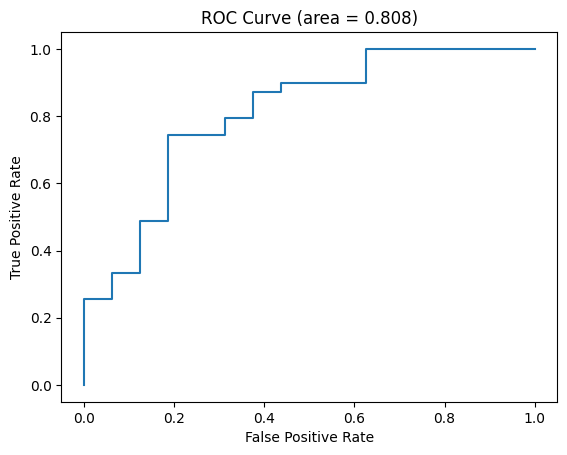

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.3f)' % roc_auc)
plt.title('ROC Curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')